## Real State price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.shape

(506, 14)

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BK       506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BK'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

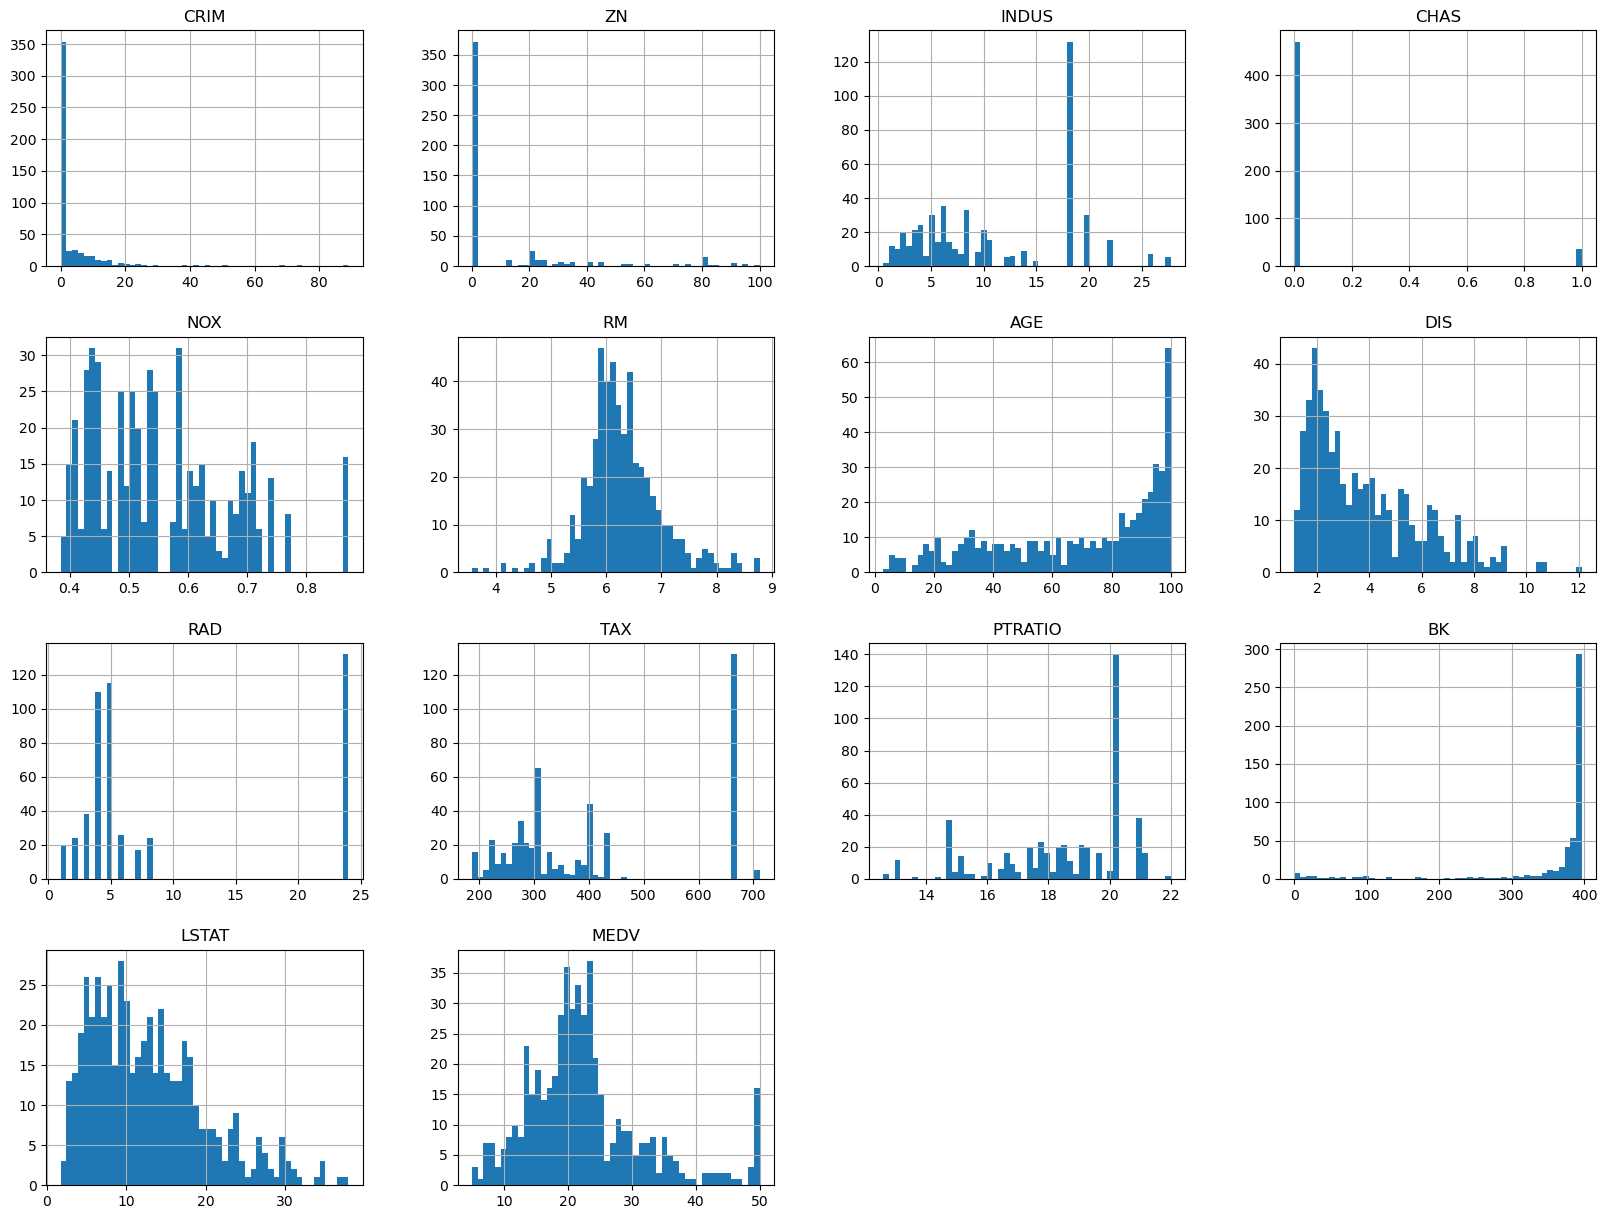

In [10]:
housing.hist(bins=50,figsize=(20,15))

## Train Test splitting

In [11]:
## the function is written for the learning purpose the sklearn can be used instead
import numpy as np
# np.random.seed(42) # fix the random number
# def split_train_test(data, test_ratio):
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data,iloc[test_indices]

In [12]:
# train_set,test_set = split_train_test(housing,0.2)

In [13]:
# print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [14]:
#data is splitted randomly the unequal data is not distributed in train and test sets
# for this the stratiffied splitting can be used
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [15]:
# Stratify the data according to the important variable
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  BK       102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
housing=strat_train_set.copy()
# make a copy of the train set to observe the correlation if the data set is big and the test data set should not be viewed

In [19]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlations

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
x=VarianceThreshold()
x.fit(housing)

VarianceThreshold()

In [22]:
x.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [23]:
corr_matrix = housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257375,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.293363,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.382255,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100082,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300178,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257375,0.293363,-0.382255,0.100082,-0.300178,1.000000,-0.241281,0.206304,-0.199079,-0.281568,-0.329010,0.122469,-0.600731,0.679894
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241281,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.206304,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.199079,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.281568,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 is strong positive correlation and the -ve is strong negative correlation

MEDV       1.000000
RM         0.679894
BK         0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

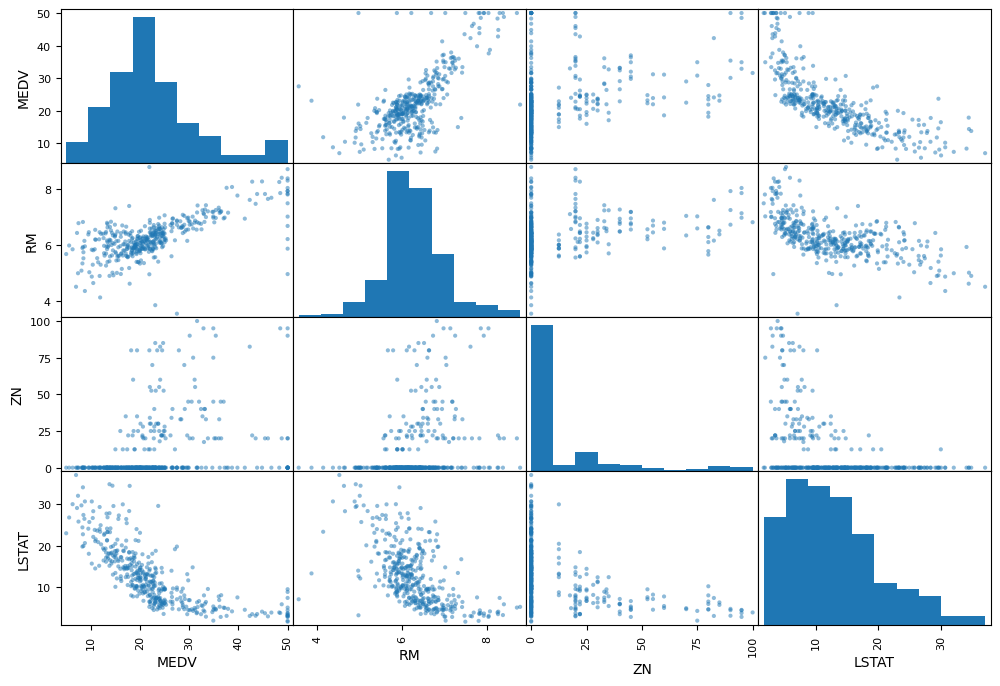

In [25]:
from pandas.plotting import scatter_matrix
# plot the strong positive and negative correlated variables
attributes= ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

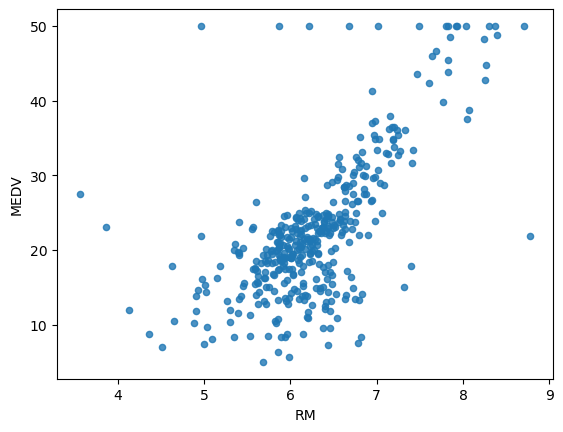

In [26]:
housing.plot(kind="scatter", x= "RM", y="MEDV", alpha=0.8)
# alpha is used to darken the concentrated data
#after observing the data remove the outliers

## Attribute combination

In [27]:
housing["TAXRM"]= housing["TAX"]/ housing["RM"]

In [28]:
housing.head() # look the first 5 data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
BK         0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

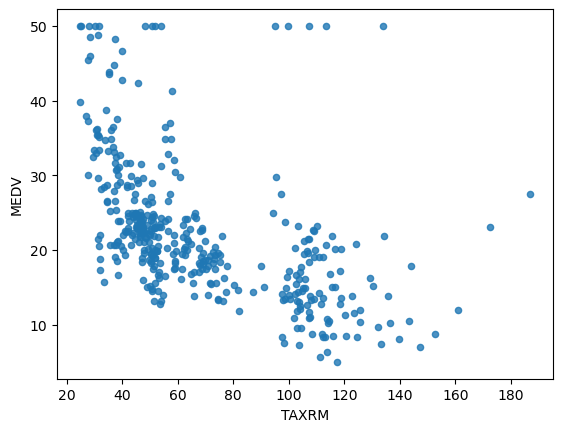

In [30]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [31]:
housing=strat_train_set.drop("MEDV",axis=1)
## Splitting the label and the data of the housing dataset
housing_labels= strat_train_set["MEDV"].copy()

## How to impute the data 
## Cleaning and replacing the missing data
Get the count and find out the missing attributes and explore the data.


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x,columns=housing.columns)# transformed data frame is made without the null values
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn DEsign

Three types of objects
1. Estimators- estimates some parameters based on a dataset eg. Imputer
It has a fit method and transform method. 
Fit method- fits the dataset and calculate the internal parameters
HyperParameter-Strategy

2. Transformers- Transforms method takes input and returns output based on the learning from fit(). It also has some convinence function. fit_transform(). This fits and then transform

3. Predictors- LinearRegression modela is an example of predictor. fit() and predict() are the two common functions. It also give some score() function which evaluate the predictions.

## Feature Scaling

1. MIn-max Scaline(Normalization)---(value-min)/(max-min)
in sklearn there is MInMaxScaler
2. Standarization---(Value-mean)/Sd
in Sklearn there is standard Scaler

Prefer the standarization as the min and max can be altered and this will have an effect on the normalization

## Creating a pipeline

In [35]:
from sklearn.pipeline import Pipeline
#Feature scaling when the numerical data is standarized or normalized
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer', SimpleImputer(strategy='median')),('std_scaler', StandardScaler())])

In [36]:
housing_num_tr= my_pipeline.fit_transform(housing)
# pass the dataframe without the imputation

In [37]:
housing_num_tr.shape

(404, 13)

## Selecting the desired model for the data

In [65]:
from sklearn.linear_model import LinearRegression
# Choose decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_RF= RandomForestRegressor()
model_DTR=DecisionTreeRegressor()
model_LR=LinearRegression() # Remove as the error is high and use another model

model_RF.fit(housing_num_tr,housing_labels)
model_DTR.fit(housing_num_tr,housing_labels)
model_LR.fit(housing_num_tr,housing_labels)

LinearRegression()

In [66]:
some_data=housing.iloc[:5]
some_labels= housing_labels.iloc[:5]

In [67]:
prepared_data=my_pipeline.transform(some_data)

In [68]:
model_RF.predict(prepared_data)
model_DTR.predict(prepared_data)
model_LR.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [69]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [80]:
from sklearn.metrics import mean_squared_error
housing_predictions_RF=model_RF.predict(housing_num_tr)
housing_predictions_DTR=model_DTR.predict(housing_num_tr)
housing_predictions_LR=model_LR.predict(housing_num_tr)
mse_RF=mean_squared_error(housing_labels,housing_predictions_RF)
mse_DTR=mean_squared_error(housing_labels,housing_predictions_DTR)
mse_LR=mean_squared_error(housing_labels,housing_predictions_LR)
rmse_RF=np.sqrt(mse_RF)
rmse_DTR=np.sqrt(mse_DTR)
rmse_LR=np.sqrt(mse_LR)

In [81]:
print("MSE Random Forest Regression:", mse_RF)
print("MSE Decision Tree Regression:",mse_DTR)
print("MSE Linear Regression:",mse_LR)
# Linear regression is removes as The error is very high so look for the another model
# DecisionTree Regressor gives the 0.00 mse as the data is overfitted. 


MSE Random Forest Regression: 1.5450845099009893
MSE Decision Tree Regression: 0.0
MSE Linear Regression: 23.322346079233675


In [82]:
print("RMSE Random Forest Regression:", rmse_RF)
print("RMSE Decision Tree Regression:",rmse_DTR)
print("RMSE Linear Regression:",rmse_LR)


RMSE Random Forest Regression: 1.2430142838684475
RMSE Decision Tree Regression: 0.0
RMSE Linear Regression: 4.829321492635759


## Using better evaluation technique-- Cross Validation
1. K-Fold and other cross validation technique

In [83]:
from sklearn.model_selection import cross_val_score
scores_RF= cross_val_score(model_RF,housing_num_tr,housing_labels, scoring='neg_mean_squared_error', cv=10)
RF_rmse_scores=np.sqrt(-scores_RF)
scores_DTR= cross_val_score(model_DTR,housing_num_tr,housing_labels, scoring='neg_mean_squared_error', cv=10)
DTR_rmse_scores=np.sqrt(-scores_DTR)
scores_LR= cross_val_score(model_LR,housing_num_tr,housing_labels, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores=np.sqrt(-scores_LR)

In [84]:
print("RMSE scores random forest regressor:",RF_rmse_scores)
print("RMSE scores Decision Tree regressor:",DTR_rmse_scores)
print("RMSE scores Linear regressor:",LR_rmse_scores)

RMSE scores random forest regressor: [2.86225553 2.94903318 4.33247145 2.45568429 3.44442787 2.6488877
 4.68734809 3.24942638 3.10752275 3.20672298]
RMSE scores Decision Tree regressor: [3.7902957  4.40263225 5.53018325 3.86302043 4.21924164 3.33117847
 4.40817423 3.83910797 3.35171598 3.71655082]
RMSE scores Linear regressor: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]


In [85]:
print("Mean RMSE random forest Regressor:",np.mean(RF_rmse_scores))
print("Mean RMSE Decision Tree Regressor:",np.mean(DTR_rmse_scores))
print("Mean RMSE Linear Regressor:",np.mean(LR_rmse_scores))

Mean RMSE random forest Regressor: 3.294378021705338
Mean RMSE Decision Tree Regressor: 4.045210073068237
Mean RMSE Linear Regressor: 5.030437102767305


In [89]:
# Since the random forest regressor with the cross validation is giving the less rmse so, its choosen.
# define function for the scores
def print_scores(scores_RF):
    print("Scores:",scores_RF)
    print("Mean:",scores_RF.mean())
    print("Standard deviation:", scores_RF.std())
def print_scores(scores_DTR):
    print("Scores:",scores_DTR)
    print("Mean:",scores_DTR.mean())
    print("Standard deviation:", scores_DTR.std())
def print_scores(scores_LR):
    print("Scores:",scores_LR)
    print("Mean:",scores_LR.mean())
    print("Standard deviation:", scores_LR.std())

In [91]:
print_scores(RF_rmse_scores)
print_scores(DTR_rmse_scores)
print_scores(LR_rmse_scores)

Scores: [2.86225553 2.94903318 4.33247145 2.45568429 3.44442787 2.6488877
 4.68734809 3.24942638 3.10752275 3.20672298]
Mean: 3.294378021705338
Standard deviation: 0.6716543260959158
Scores: [3.7902957  4.40263225 5.53018325 3.86302043 4.21924164 3.33117847
 4.40817423 3.83910797 3.35171598 3.71655082]
Mean: 4.045210073068237
Standard deviation: 0.6110949599801362
Scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean: 5.030437102767305
Standard deviation: 1.0607661158294834


Note the Scores for each model and the respective outputs befor supplyting the test data.
Now Test the other model: RandomForest
The score for the Random forest regressor is best among all three model. Since, It has to be choosen.

sklearn. joblib dumb the model and load it 

## Saving the model

In [97]:
from joblib import dump,load
dump(model_RF,"Model_Usage.joblib")

['Model_Usage.joblib']

## Testing the model on the test data

In [98]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_prediction=model_RF.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(Y_test))

[24.783 11.836 25.246 21.904 19.283 14.819 20.227 14.167 32.4   43.481
 19.497 12.218 23.764 29.48  19.444 10.647 31.629 14.553 23.49  18.5
 19.779 18.097 18.731 21.732 18.765 30.868 16.149 33.131  8.991 33.631
 22.747 21.173 22.806 11.283 21.064 11.657 44.229 24.442 23.555 41.855
 24.029 30.514 20.501 21.046 19.307 32.871 44.549 20.116 20.38  21.512
 21.327 14.211 21.356 14.563 25.404 32.55  42.463 28.986 19.059 20.675
 46.658  9.627 19.046 25.062 13.87  32.681 20.114 17.864 19.348 33.375
 25.288 22.881 21.071 22.6   34.716 12.926 15.978 20.097 20.715 21.294
 21.965 21.136 13.845 22.848 20.972 21.16  14.744 21.69  21.433 23.116
 18.836 27.052  7.594 26.63  19.194 30.159 19.58  31.667 14.555 26.77
 21.704 19.844] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

In [99]:
final_rmse

3.0490027443894023

In [100]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])